In [2]:
# import libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, Lambda
from tensorflow.keras.models import Model
from tensorflow.keras import backend as K
from tensorflow.keras import metrics
from tensorflow.keras import regularizers

In [3]:
# Set Environment Variables
%matplotlib inline
RANDOM_SEED = 27
LABELS = ["Normal", "Fraud"]

In [4]:
df = pd.read_csv("creditcard.csv")
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [5]:
# Time is irrelevant
df2 = df.drop(['Time'], axis=1)
# Standardize Amount
#df2['Amount'] = StandardScaler().fit_transform(df2['Amount'].values.reshape(-1, 1))
# split data
X_train, X_test = train_test_split(df2, test_size=0.2, random_state=RANDOM_SEED)
# Train on Normal (Class=0)
X_train = X_train[X_train.Class == 0]
# "Class" variable is not needed
X_train = X_train.drop(['Class'], axis=1)
# test data
y_test = X_test['Class']
X_test = X_test.drop(['Class'], axis=1)

# Standardize data based on mean & sd of X_train
mean = X_train.mean(axis=0)
std = X_train.std(axis=0)
X_train = (X_train - mean) / std
X_test = (X_test - mean) / std

# convert to numpy
X_train = X_train.to_numpy()
X_test = X_test.to_numpy()
y_test = y_test.to_numpy()

print(mean)
print(std)

V1         0.010273
V2        -0.007151
V3         0.010612
V4        -0.005127
V5         0.003601
V6         0.002339
V7         0.009724
V8        -0.000476
V9         0.005126
V10        0.010565
V11       -0.008178
V12        0.008239
V13       -0.000493
V14        0.011237
V15        0.000019
V16        0.006060
V17        0.013083
V18        0.004112
V19       -0.002380
V20       -0.000682
V21       -0.000163
V22        0.000740
V23        0.000664
V24        0.000062
V25       -0.000077
V26       -0.000596
V27        0.000168
V28       -0.000408
Amount    88.565269
dtype: float64
V1          1.925243
V2          1.630730
V3          1.461476
V4          1.399370
V5          1.356850
V6          1.329395
V7          1.181756
V8          1.164516
V9          1.091195
V10         1.044384
V11         1.004542
V12         0.948007
V13         0.996642
V14         0.899984
V15         0.915696
V16         0.846508
V17         0.753978
V18         0.825109
V19         0.812298
V20   

In [10]:
# check standardization of the data
print(np.mean(X_train,axis=0))
print(np.std(X_train,axis=0))
print(np.mean(X_test,axis=0))
print(np.std(X_test,axis=0))

[-7.55191998e-17  5.43082229e-17  2.99952578e-16  4.59050524e-17
  1.18081727e-17  2.18669865e-17  1.65689281e-16 -1.07773005e-18
  2.37412996e-18  3.02732809e-16 -1.17332002e-16 -1.29327606e-17
 -9.52775841e-18 -7.74091322e-17 -2.22418491e-17  2.06174444e-18
 -2.37256804e-16 -3.98603926e-17  6.24771043e-19 -5.99155430e-17
 -4.60300066e-17 -3.69864458e-17  2.69901091e-17 -3.85483734e-17
 -3.59243350e-17 -2.47409333e-17 -2.99890101e-18  1.24329438e-17
  7.05447728e-14]
[0.9999978 0.9999978 0.9999978 0.9999978 0.9999978 0.9999978 0.9999978
 0.9999978 0.9999978 0.9999978 0.9999978 0.9999978 0.9999978 0.9999978
 0.9999978 0.9999978 0.9999978 0.9999978 0.9999978 0.9999978 0.9999978
 0.9999978 0.9999978 0.9999978 0.9999978 0.9999978 0.9999978 0.9999978
 0.9999978]
[-9.64158338e-03  6.78752177e-03 -3.24662393e-03 -3.59966298e-03
  2.35552828e-03 -1.54444756e-03 -8.79391841e-03 -9.22211456e-04
 -7.35124705e-03 -1.33556197e-02  1.48988153e-02  9.97076818e-04
  3.49648368e-03 -9.50247775e-03  6.

# Fraud Detection

## (1) Set Up Variational Autoencoder Network

In [11]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, Lambda
from tensorflow.keras.models import Model
from tensorflow.keras import backend as K
from tensorflow.keras import metrics
from tensorflow.keras import regularizers

In [49]:
# defining the key parameters
batch_size = 100
original_dim = 29
latent_dim = 5
intermediate_dim1 = 20
intermediate_dim2 = 10
epochs = 50
epsilon_std = 1.0

In [50]:
# sampling from mean and sd in VAE
def sampling(args: tuple):
    # we grab the variables from the tuple
    epsilon = K.random_normal(shape=(K.shape(z_mean)[0], latent_dim), mean=0.,
                              stddev=epsilon_std)
    return z_mean + K.exp(z_log_var / 2) * epsilon

In [51]:
#########################
# input to our encoder
#########################
x = Input(shape=(original_dim,), name="input")
# intermediate layer
#h1 = Dense(intermediate_dim1, activation='tanh', name="encoding1")(x)
h1 = Dense(intermediate_dim1, activation="tanh", name="encoding1", activity_regularizer=regularizers.l1(10e-5))(x)
h = Dense(intermediate_dim2, activation='relu', name="encoding")(h1)
# defining the mean of the latent space
z_mean = Dense(latent_dim, name="mean")(h)
# defining the log variance of the latent space
z_log_var = Dense(latent_dim, name="log-variance")(h)
# note that "output_shape" isn't necessary with the TensorFlow backend
z = Lambda(sampling, output_shape=(latent_dim,))([z_mean, z_log_var])
# defining the encoder as a keras model
encoder = Model(x, [z_mean, z_log_var, z], name="encoder")
# print out summary of what we just did
encoder.summary()

Model: "encoder"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input (InputLayer)             [(None, 29)]         0           []                               
                                                                                                  
 encoding1 (Dense)              (None, 20)           600         ['input[0][0]']                  
                                                                                                  
 encoding (Dense)               (None, 10)           210         ['encoding1[0][0]']              
                                                                                                  
 mean (Dense)                   (None, 5)            55          ['encoding[0][0]']               
                                                                                            

In [52]:
#########################
# Input to the decoder
#########################
input_decoder = Input(shape=(latent_dim,), name="decoder_input")
# taking the latent space to intermediate dimension
decoder_h1 = Dense(intermediate_dim2, activation='relu', name="decoder_h2")(input_decoder)
decoder_h = Dense(intermediate_dim1, activation='relu', name="decoder_h")(decoder_h1)
# getting the mean from the original dimension
x_decoded = Dense(original_dim, activation='tanh', name="flat_decoded")(decoder_h)
# defining the decoder as a keras model
decoder = Model(input_decoder, x_decoded, name="decoder")
decoder.summary()
     

Model: "decoder"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 decoder_input (InputLayer)  [(None, 5)]               0         
                                                                 
 decoder_h2 (Dense)          (None, 10)                60        
                                                                 
 decoder_h (Dense)           (None, 20)                220       
                                                                 
 flat_decoded (Dense)        (None, 29)                609       
                                                                 
Total params: 889
Trainable params: 889
Non-trainable params: 0
_________________________________________________________________


In [16]:
# Variational Autoencoder
# grab the output. Recall, that we need to grab the 3rd element our sampling z
output_combined = decoder(encoder(x)[2])
# link the input and the overall output
vae = Model(x, output_combined)
# print out what the overall model looks like
vae.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input (InputLayer)          [(None, 29)]              0         
                                                                 
 encoder (Functional)        [(None, 5),               920       
                              (None, 5),                         
                              (None, 5)]                         
                                                                 
 decoder (Functional)        (None, 29)                889       
                                                                 
Total params: 1,809
Trainable params: 1,809
Non-trainable params: 0
_________________________________________________________________


In [17]:
# Define VAE Loss Function
def vae_loss(x: tf.Tensor, x_decoded_mean: tf.Tensor,z_log_var=z_log_var, z_mean=z_mean, original_dim=original_dim):
    xent_loss = original_dim * metrics.binary_crossentropy(x, x_decoded_mean)
    kl_loss = - 0.5 * K.sum(1 + z_log_var - K.square(z_mean) - K.exp(z_log_var), axis=-1)
    vae_loss = K.mean(xent_loss + kl_loss)
    return vae_loss

In [18]:
vae.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])

## (2) Train Neural Network  

In [19]:
history = vae.fit(X_train, X_train,
                    epochs=2*epochs,
                    batch_size=batch_size,
                    shuffle=True,
                    validation_data=(X_test, X_test),
                    verbose=1).history

Epoch 1/100
2275/2275 [==============================] - 4s 1ms/step - loss: 0.8026 - accuracy: 0.1967 - val_loss: 0.7639 - val_accuracy: 0.2267
Epoch 2/100
2275/2275 [==============================] - 3s 1ms/step - loss: 0.6977 - accuracy: 0.2259 - val_loss: 0.7285 - val_accuracy: 0.2373
Epoch 3/100
2275/2275 [==============================] - 3s 1ms/step - loss: 0.6698 - accuracy: 0.2547 - val_loss: 0.7046 - val_accuracy: 0.2664
Epoch 4/100
2275/2275 [==============================] - 3s 1ms/step - loss: 0.6517 - accuracy: 0.2748 - val_loss: 0.6904 - val_accuracy: 0.2801
Epoch 5/100
2275/2275 [==============================] - 3s 1ms/step - loss: 0.6406 - accuracy: 0.2913 - val_loss: 0.6810 - val_accuracy: 0.2995
Epoch 6/100
2275/2275 [==============================] - 3s 1ms/step - loss: 0.6327 - accuracy: 0.3001 - val_loss: 0.6759 - val_accuracy: 0.3073
Epoch 7/100
2275/2275 [==============================] - 3s 1ms/step - loss: 0.6274 - accuracy: 0.3095 - val_loss: 0.6714 - val_ac

## (3) Reconstruction Error

In [20]:
##########################################
# prediction & reconstruction error
##########################################
predictions = vae.predict(X_test)
mse = np.mean(np.power(X_test - predictions, 2), axis=1)
error_df = pd.DataFrame({'reconstruction_error': mse, 'true_class': y_test})
print("Full Sample",error_df.describe())
error_df_true = error_df[(error_df['true_class']== 0)]
print("Normal Sample",error_df_true.describe())
error_df_false = error_df[(error_df['true_class']== 1)]
print("Fraud Sample",error_df_false.describe())

1781/1781 [==============================] - 1s 735us/step
Full Sample        reconstruction_error    true_class
count          56962.000000  56962.000000
mean               0.587870      0.001826
std                3.875372      0.042690
min                0.015369      0.000000
25%                0.124252      0.000000
50%                0.225738      0.000000
75%                0.414081      0.000000
max              447.398434      1.000000
Normal Sample        reconstruction_error  true_class
count          56858.000000     56858.0
mean               0.543117         0.0
std                3.499689         0.0
min                0.015369         0.0
25%                0.124120         0.0
50%                0.225364         0.0
75%                0.412103         0.0
max              447.398434         0.0
Fraud Sample        reconstruction_error  true_class
count            104.000000       104.0
mean              25.054943         1.0
std               30.644000         0.0
min 

## Post Analysis

In [21]:
from sklearn.metrics import (confusion_matrix, precision_recall_curve, auc,
                             roc_curve, recall_score, classification_report, f1_score,
                             precision_recall_fscore_support)

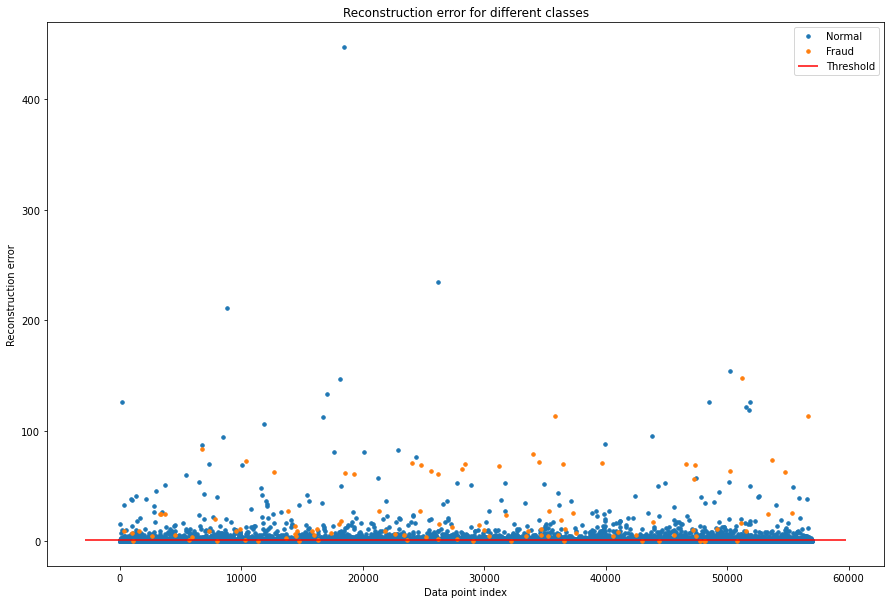

In [22]:
# scatter plot
threshold = 0.9
groups = error_df.groupby('true_class')
fig, ax = plt.subplots(figsize=(15, 10))

for name, group in groups:
    ax.plot(group.index, group.reconstruction_error, marker='o', ms=3.5, linestyle='',
            label= "Fraud" if name == 1 else "Normal")
ax.hlines(threshold, ax.get_xlim()[0], ax.get_xlim()[1], colors="r", zorder=100, label='Threshold')
ax.legend()
plt.title("Reconstruction error for different classes")
plt.ylabel("Reconstruction error")
plt.xlabel("Data point index")
plt.show();

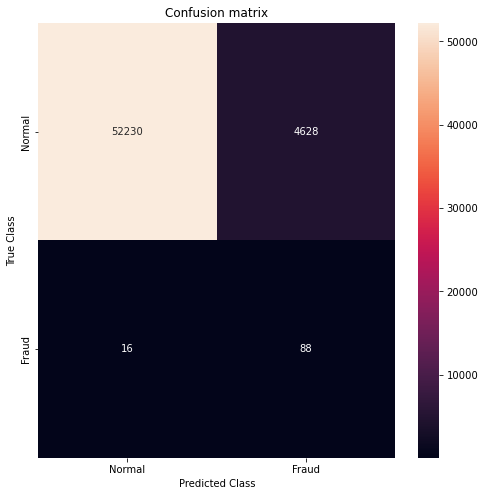

In [23]:
# confusion matrix
threshold = 0.9
# And see how well we're dividing the two types of transactions:
groups = error_df.groupby('true_class')
# predict fraud
y_pred = [1 if e > threshold else 0 for e in error_df.reconstruction_error.values]
conf_matrix = confusion_matrix(error_df.true_class, y_pred)
# plot confusion matrix
plt.figure(figsize=(8, 8))
sns.heatmap(conf_matrix, xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt="d");
plt.title("Confusion matrix")
plt.ylabel('True Class')
plt.xlabel('Predicted Class')
plt.show()

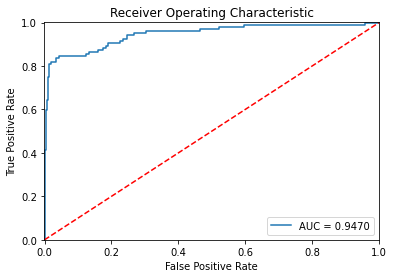

In [24]:
# ROC
fpr, tpr, thresholds = roc_curve(error_df.true_class, error_df.reconstruction_error)
roc_auc = auc(fpr, tpr)
# plot
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, label='AUC = %0.4f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.001, 1])
plt.ylim([0, 1.001])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show();

In [43]:
random_samples = np.random.normal(size=(50000, latent_dim))

std = np.array(std)
mean = np.array(mean)

generated_data = decoder.predict(random_samples) * std + mean

1563/1563 [==============================] - 1s 545us/step


In [44]:
print(generated_data)

[[ 1.48348971e+00  8.90967155e-01 -6.63166856e-01 ... -7.59588384e-04
   2.47153410e-01  8.96505668e+01]
 [-1.90785200e+00 -6.82466405e-01 -1.20827786e+00 ... -3.09952602e-01
  -3.24283662e-01  8.07576135e+01]
 [-1.49900191e+00  1.15327972e+00 -2.57663908e-01 ... -2.85108152e-01
  -2.38347573e-02  9.47610225e+01]
 ...
 [ 1.14638448e+00  7.09307408e-01 -1.19688752e+00 ... -2.66691387e-01
   1.40470978e-01  7.73813703e+01]
 [ 1.24926871e+00  6.74512865e-01 -1.15222123e+00 ... -1.08377561e-01
   2.29528087e-01  9.28501108e+01]
 [ 1.02918488e+00  1.13988413e+00 -1.07262988e+00 ... -2.64580005e-01
   2.22672365e-01  1.22216952e+02]]


In [45]:
generated_data.shape

(50000, 29)

In [46]:
X_train.shape

(227457, 29)

In [47]:
new_dataset = np.concatenate((X_train, generated_data), axis=0)

In [48]:
new_dataset.shape

(277457, 29)